# Solar Radiation

The incident solar radiation on given location is highly influenced by the latitudinal position. In this exercise we examine a method to derive the estimated maximum solar irradiance for each day of the year from a timeseries of observations.


In [6]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [7]:
# Load sample data
df = pd.read_csv("../datasets/KS_Manhattan_6_SSW.csv")
df.head()


,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
0,53974,20031001,1.201,-96.61,39.1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-99.0,-99.0,-99.0,-99,-99,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,53974,20031002,1.201,-96.61,39.1,18.9,2.5,10.7,11.7,0.0,...,-99.0,-99.0,-99.0,-99,-99,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,53974,20031003,1.201,-96.61,39.1,22.6,8.1,15.4,14.8,0.0,...,-99.0,-99.0,-99.0,-99,-99,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,53974,20031004,1.201,-96.61,39.1,22.6,3.8,13.2,14.0,0.0,...,-99.0,-99.0,-99.0,-99,-99,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,53974,20031005,1.201,-96.61,39.1,25.0,10.6,17.8,17.3,0.0,...,-99.0,-99.0,-99.0,-99,-99,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [8]:
# Convert date string to pandas datetime format
df["LST_DATE"] = pd.to_datetime(df["LST_DATE"], format="%Y%m%d")
df["LST_DATE"].head() # CHeck our conversion.


0   2003-10-01
1   2003-10-02
2   2003-10-03
3   2003-10-04
4   2003-10-05
Name: LST_DATE, dtype: datetime64[ns]

In [9]:
# Convert missing values represented as -9999 to NaN
df[df == -9999] = np.nan


In [10]:
# Add year, month, and day of the year to summarize data in future steps.
df["YEAR"] = df["LST_DATE"].dt.year
df["MONTH"] = df["LST_DATE"].dt.month
df["DOY"] = df["LST_DATE"].dt.dayofyear


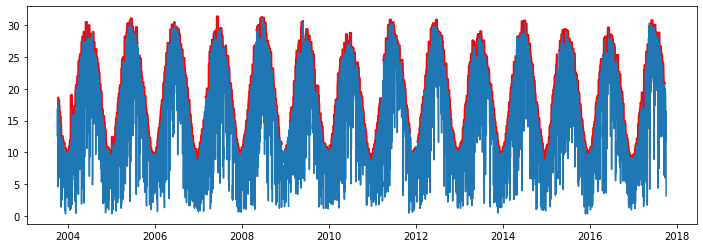

In [98]:
# Observe trends in solar radiation data
plt.figure(figsize=(12,4))
plt.plot(df["LST_DATE"], df["SOLARAD_DAILY"])
plt.plot(df["LST_DATE"], df["SOLARAD_DAILY"].rolling(window=15, center=True).max(), '-r')
plt.show()


In [133]:
# Compute maximum solar radiation (proxy for ideal, non-cloudy conditions)
solar_rad_max = df_grouped["SOLARAD_DAILY"].rolling(window=15, center=True).quantile(0.95)


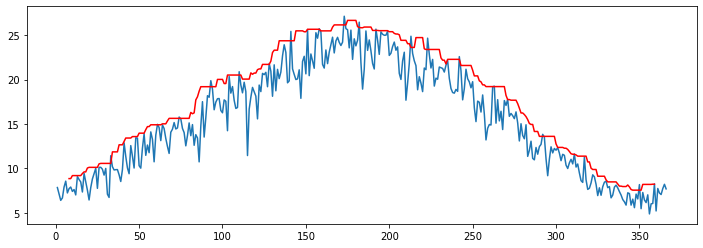

In [134]:
plt.figure(figsize=(12,4))
plt.plot(df_grouped.index, df_grouped["SOLARAD_DAILY"])
plt.plot(df_grouped.index, solar_rad_max, '-r')

plt.show()